## 1. Load files (change main_dir and force_dir accordingly)

In [455]:
import pyemma
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.matplotlib.rcParams.update({'font.size': 15})
import MDAnalysis
import mdtraj as md
import pyemma.plots as mplt
from IPython.display import Image
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn import metrics
import seaborn as sns
import pandas as pd

In [456]:
main_dir = '/media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/'
force_name = 'a99SBstar-ILDN-TIP3P'

In [457]:
force_dir = main_dir + force_name + '/pnas2018b-Ab40-'+ force_name +'-protein'

import os
os.chdir(force_dir)

In [458]:
ls

ab40-desres.pdb
analysis/
DESRES-Trajectory_pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein.mae
pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein-0000.dcd
pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein-0001.dcd
pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein-0002.dcd
pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein_times.csv
tica_1_2_a99SBstar-ILDN-TIP3P.dat
traj_concatenated.dcd


In [459]:
pbdfile_A40 = force_dir+'/ab40-desres.pdb'

traj_concatenated = force_dir + '/traj_concatenated.dcd'

traj_0 = force_dir +'/pnas2018b-Ab40-'+ force_name +'-protein-0000.dcd'
traj_1 = force_dir +'/pnas2018b-Ab40-'+ force_name +'-protein-0001.dcd'
traj_2 = force_dir +'/pnas2018b-Ab40-'+ force_name +'-protein-0002.dcd'

traj_list = [traj_0, traj_1, traj_2]

In [460]:
#for checking the trajectory lenght we can use the print commands below
reader1 = MDAnalysis.coordinates.DCD.DCDReader(traj_0)
reader2 = MDAnalysis.coordinates.DCD.DCDReader(traj_1)
reader3 = MDAnalysis.coordinates.DCD.DCDReader(traj_2)
reader4 = MDAnalysis.coordinates.DCD.DCDReader(traj_concatenated)
print('traj 1:',reader1,'\n')
print('traj 2:',reader2,'\n')
print('traj 3:',reader3,'\n')
print('traj concatenated:',reader4)

traj 1: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBstar-ILDN-TIP3P/pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein/pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein-0000.dcd with 10000 frames of 598 atoms> 

traj 2: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBstar-ILDN-TIP3P/pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein/pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein-0001.dcd with 10000 frames of 598 atoms> 

traj 3: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBstar-ILDN-TIP3P/pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein/pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein-0002.dcd with 9977 frames of 598 atoms> 

traj concatenated: <DCDReader /media/biosim11/Argha_HDD/HiWi_Prof_strodel/jupyter_work/Suman_5_08/deshaw_ss/DEshaw-ab40/a99SBstar-ILDN-TIP3P/pnas2018b-Ab40-a99SBstar-ILDN-TIP3P-protein/traj_concatenated.dcd with 29977 

## 2. Feature selection (C$\alpha$)

In [461]:
feat_ab402=pyemma.coordinates.featurizer(pbdfile_A40)
feat_ab402.add_distances_ca()
print('c-alpha_dist_featdim:',feat_ab402.dimension())
#feat_ab402

c-alpha_dist_featdim: 703


In [462]:
ca_distances = pyemma.coordinates.load(traj_list, feat_ab402)
inp2 = pyemma.coordinates.source(traj_list, feat_ab402)
ca_distances_conc = pyemma.coordinates.load(traj_concatenated, feat_ab402)
inp2_conc = pyemma.coordinates.source(traj_concatenated, feat_ab402)

In [463]:
#an additional check can be done printing the trajectory leghts

print(inp2.trajectory_lengths())
print('\n')
print(inp2_conc.trajectory_lengths())

[10000 10000  9977]


[29977]


## 3. TICA dimensionality reduction (first 2 tica co-ordinates)

In [464]:
tica_obj_ca_2D = pyemma.coordinates.tica(inp2_conc, lag = 50, dim=2)

In [465]:
print('dimension for c-alpha on first two tica spaces:',tica_obj_ca_2D.dimension())

dimension for c-alpha on first two tica spaces: 2


In [466]:
tics_ca_2D = tica_obj_ca_2D.get_output()
tics_ca_2D_conc=np.concatenate(tics_ca_2D)

Text(0, 0.5, 'TICA 2')

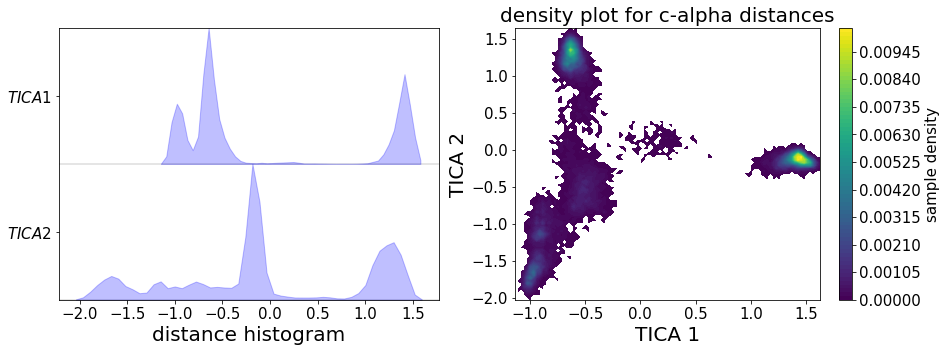

In [467]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
pyemma.plots.plot_feature_histograms(tics_ca_2D_conc, feature_labels=['$TICA 1$', '$TICA 2$'], ax=axes[0])
axes[0].set_xlabel('distance histogram', fontsize = 20.0)
pyemma.plots.plot_density(*tics_ca_2D_conc.T, ax=axes[1])
axes[1].set_title('density plot for c-alpha distances', fontsize = 20.0)
axes[1].set_xlabel('TICA 1', fontsize = 20.0)
axes[1].set_ylabel('TICA 2', fontsize = 20.0)

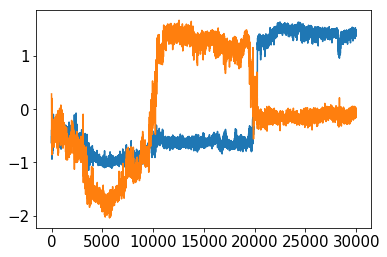

In [468]:
plt.plot(tics_ca_2D_conc[:,0])
plt.plot(tics_ca_2D_conc[:,1])

<Figure size 1080x360 with 0 Axes>

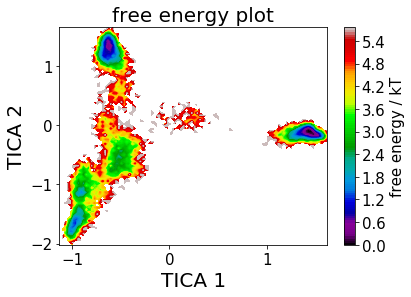

In [469]:
plt.figure(figsize=(15,5))
pyemma.plots.plot_free_energy(np.vstack(tics_ca_2D)[:,0], np.vstack(tics_ca_2D)[:,1])
plt.title('free energy plot', fontsize = 20.0)
plt.xlabel('TICA 1', fontsize = 20.0)
plt.ylabel('TICA 2', fontsize = 20.0)
plt.show()

## 4. Clustering- HDBscan 

In [470]:
data = tics_ca_2D_conc
data.shape

(29977, 2)

In [615]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=4000, min_samples=30).fit(data)

/home/biosim11/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/biosim11/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/biosim11/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/biosim11/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


Text(0, 0.5, 'TIC 2')

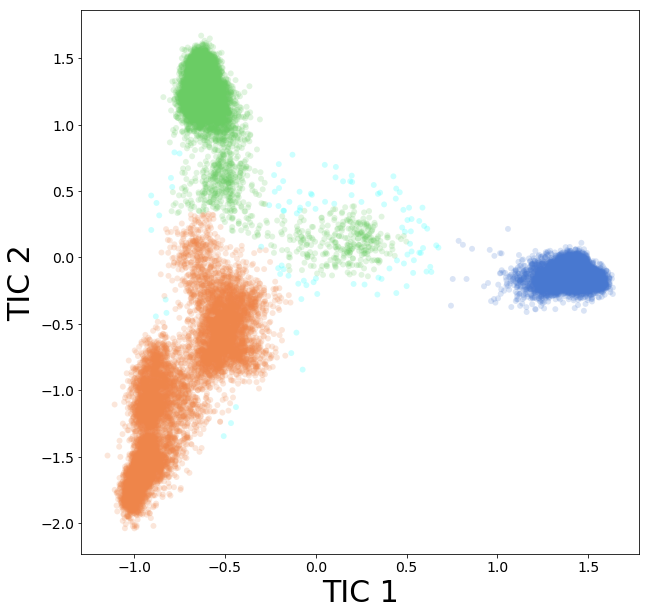

In [616]:
color_palette = sns.color_palette('muted', 10)
cluster_colors = [color_palette[x] if x >= 0
                  else 'cyan'
                  for x in clusterer.labels_]
#cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         #zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(10,10))
plt.scatter(*data.T, s=35, linewidth=0, c=cluster_colors, alpha=0.20)
plt.xlabel('TIC 1', fontsize=30)
plt.ylabel('TIC 2', fontsize=30)

In [635]:
pd.DataFrame(dtraj_hdb_raw[20400:20450,])

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [613]:
dtraj_hdb_raw = clusterer.labels_
#Delete the noise
dtraj_hdb = dtraj_hdb_raw[dtraj_hdb_raw != -1]
print('not classified points:', len(dtraj_hdb_raw)-len(dtraj_hdb))

not classified points: 585


In [598]:
its = pyemma.msm.timescales_msm(dtraj_hdb, lags=[1,10,20, 50])
its2 = pyemma.msm.timescales_msm(dtraj_hdb, lags=[1, 50, 75, 100, 200])
its3 = pyemma.msm.timescales_msm(dtraj_hdb, lags=[1, 200, 300, 400, 500,1000])
#its4 = pyemma.msm.timescales_msm(dtraj_hdb, lags=[1, 500, 1000, 1500])

Text(0.5, 1.0, 'from 0 to 1000 ns')

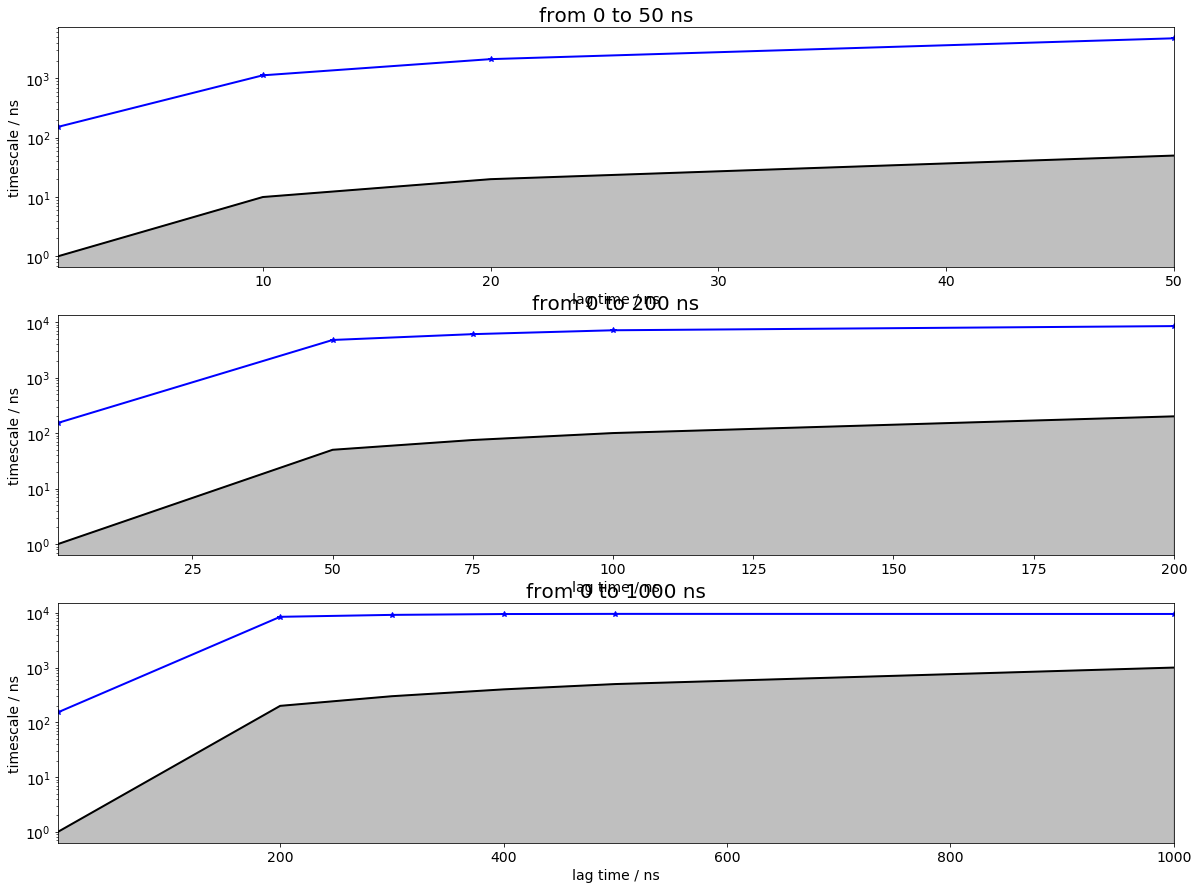

In [599]:
fig, ax = plt.subplots(3, 1, figsize=(20, 15))

mplt.plot_implied_timescales(its, show_mean=False, ylog=True, dt=1, units='ns', linewidth=2, marker='*',nits=3,ax=ax[0])
ax[0].set_title('from 0 to 50 ns', fontsize=20)

mplt.plot_implied_timescales(its2, show_mean=False, ylog=True, dt=1, units='ns', linewidth=2, marker='*',nits=3,ax=ax[1])
ax[1].set_title('from 0 to 200 ns', fontsize=20)

mplt.plot_implied_timescales(its3, show_mean=False, ylog=True, dt=1, units='ns', linewidth=2, marker='*',nits=3,ax=ax[2])
ax[2].set_title('from 0 to 1000 ns', fontsize=20)

#mplt.plot_implied_timescales(its4, show_mean=False, ylog=True, dt=1, units='ns', linewidth=2, marker='*',nits=3,ax=ax[3])
#ax[3].set_title('from 0 to 5000 ns', fontsize=20)

In [600]:
msm_lag200_bayes = pyemma.msm.estimate_markov_model(dtraj_hdb, lag = 200, dt_traj='1 ns')

In [640]:
msm_lag200_bayes.active_set

array([1, 2])

In [593]:
print ('fraction of states used = ', msm_lag200_bayes.active_state_fraction)
print ('fraction of counts used = ', msm_lag200_bayes.active_count_fraction)


fraction of states used =  0.75
fraction of counts used =  0.6736456512972173


In [518]:
np.max(dtraj_hdb)

3

In [478]:
msm_lag200_bayes.transition_matrix

array([[9.99467173e-01, 5.32827053e-04, 0.00000000e+00],
       [5.67832033e-02, 8.80839165e-01, 6.23776317e-02],
       [0.00000000e+00, 3.56753340e-02, 9.64324666e-01]])

<Figure size 2160x1800 with 0 Axes>

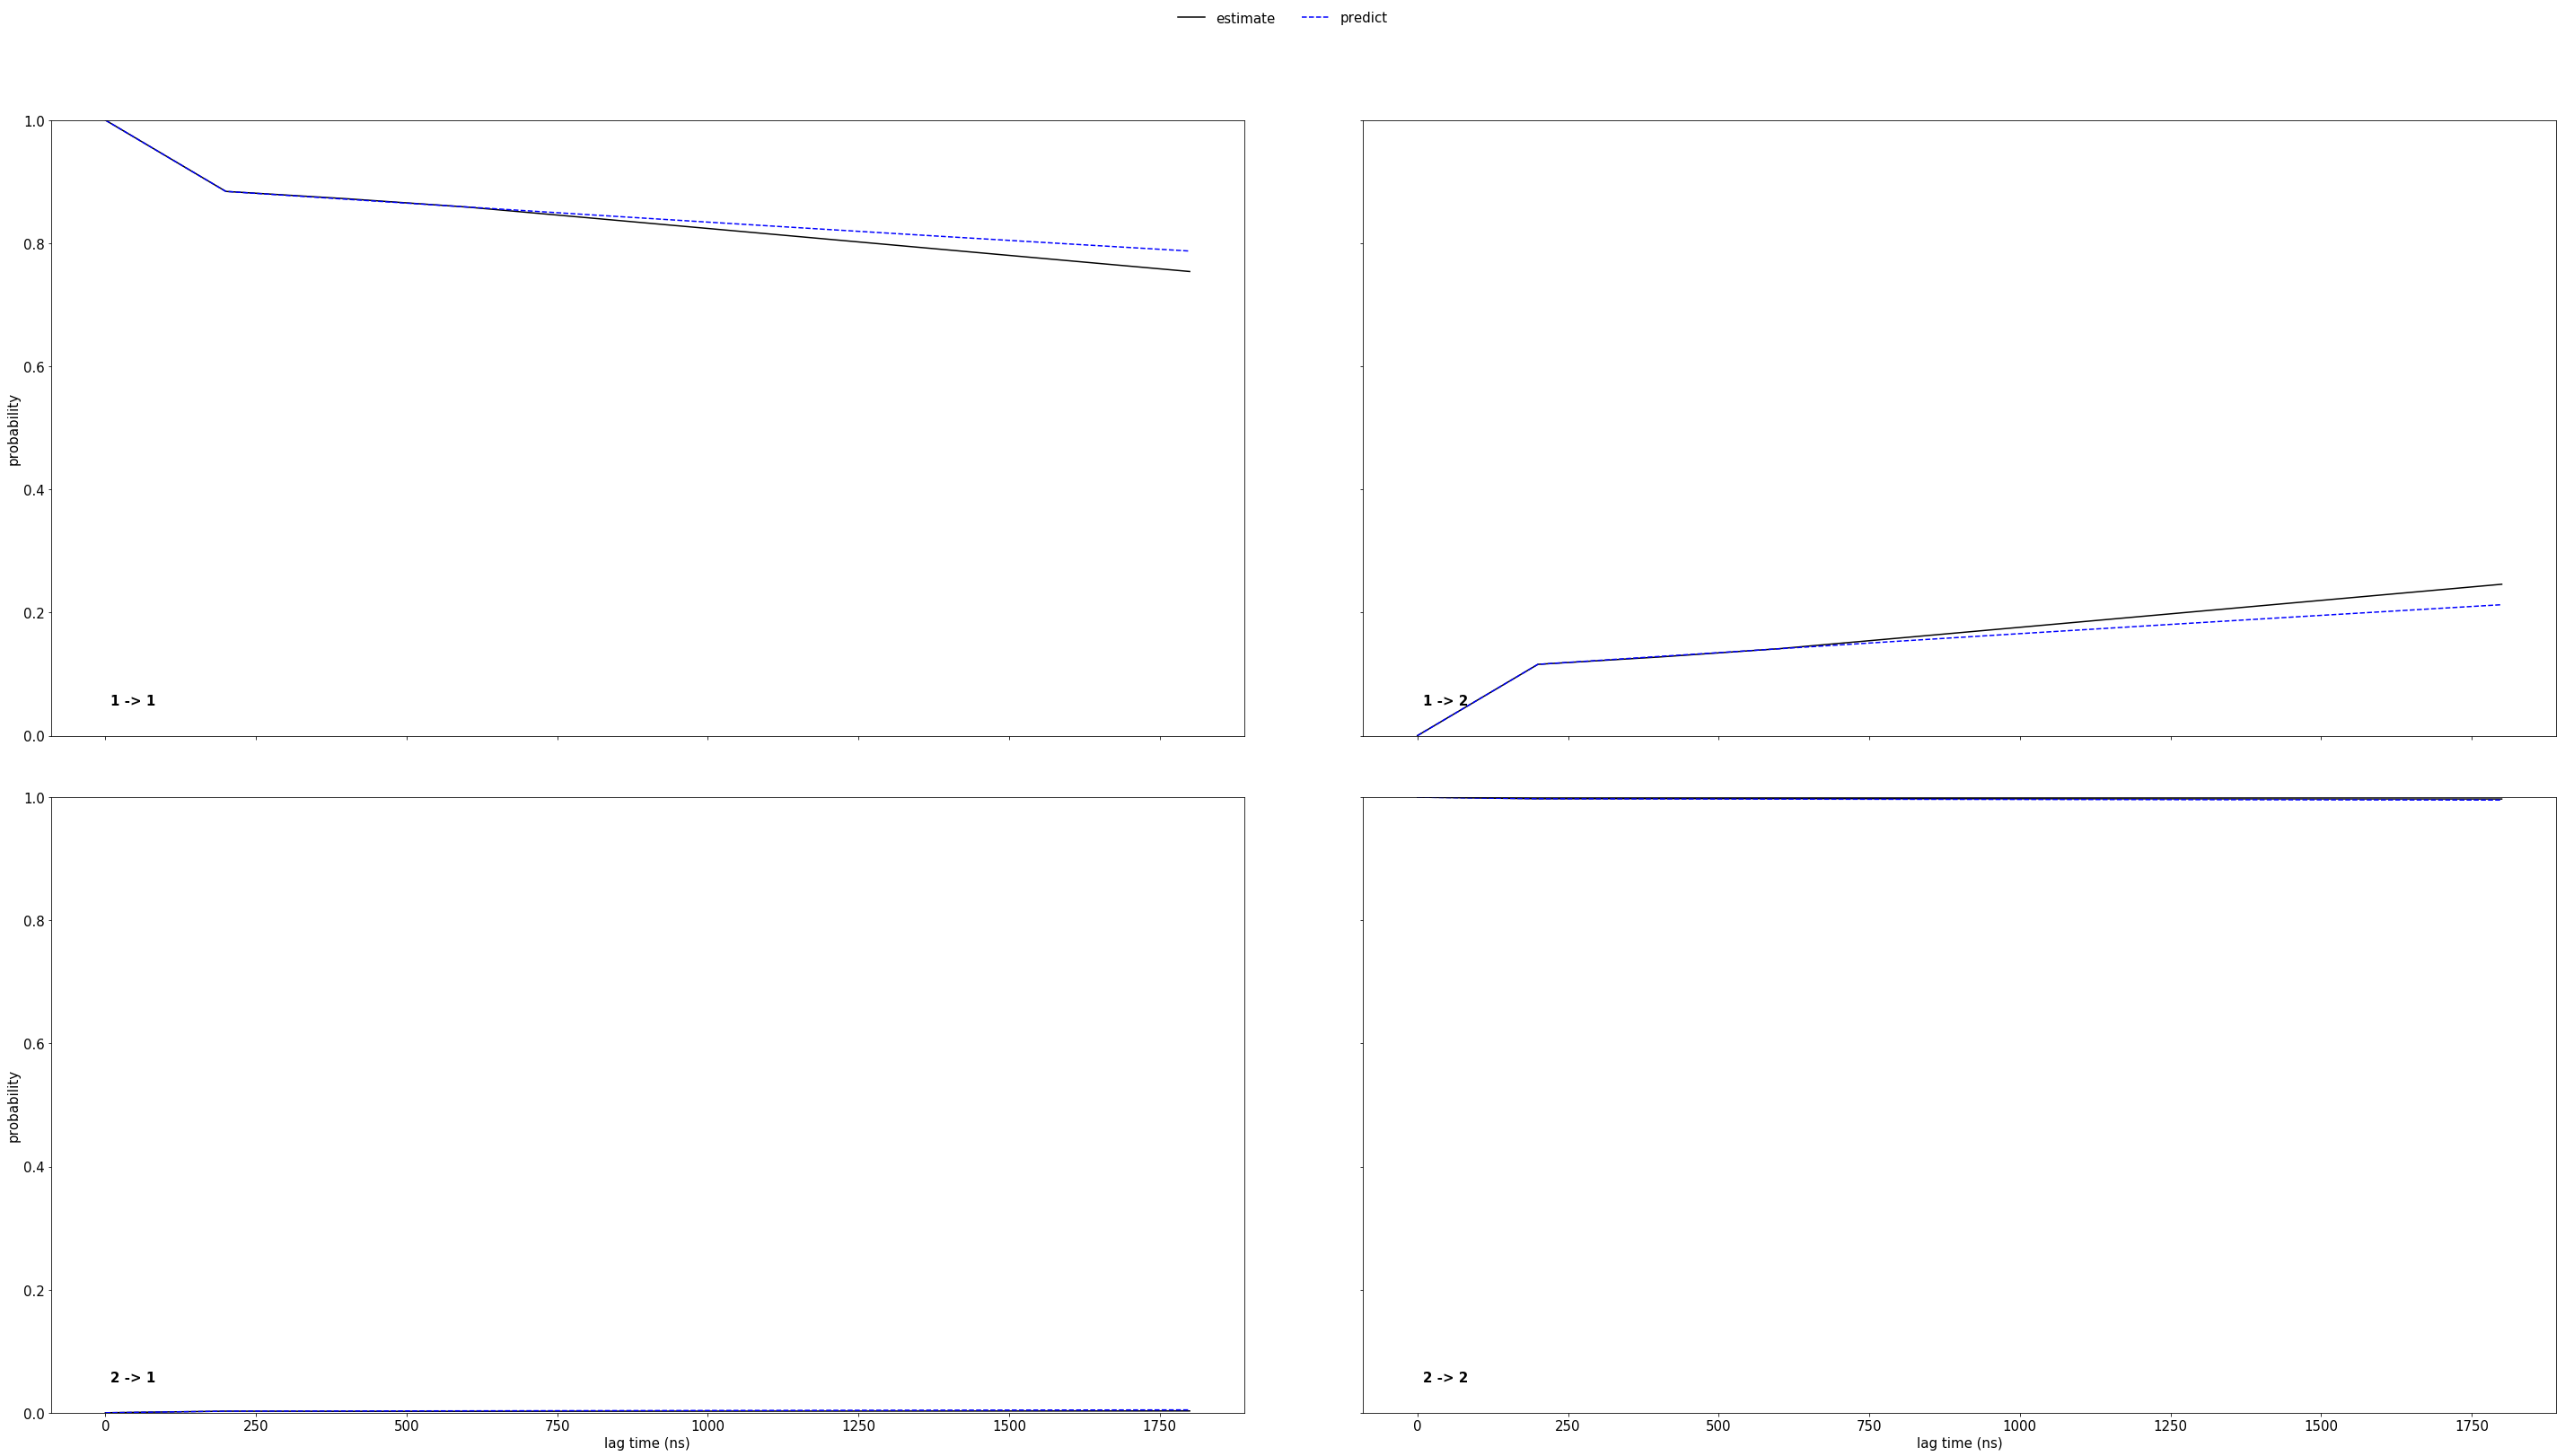

In [481]:
plt.figure(figsize=(30,25))
pyemma.plots.plot_cktest(msm_lag200_bayes.cktest(2), units='ns', figsize=(50,25));

In [482]:
hmm = msm_lag200_bayes.coarse_grain(3)


In [636]:
hmm_3_NoC.metastable_assignments

array([1, 1, 0, 0])

In [637]:
hmm.stationary_distribution

array([1., 0., 0.])

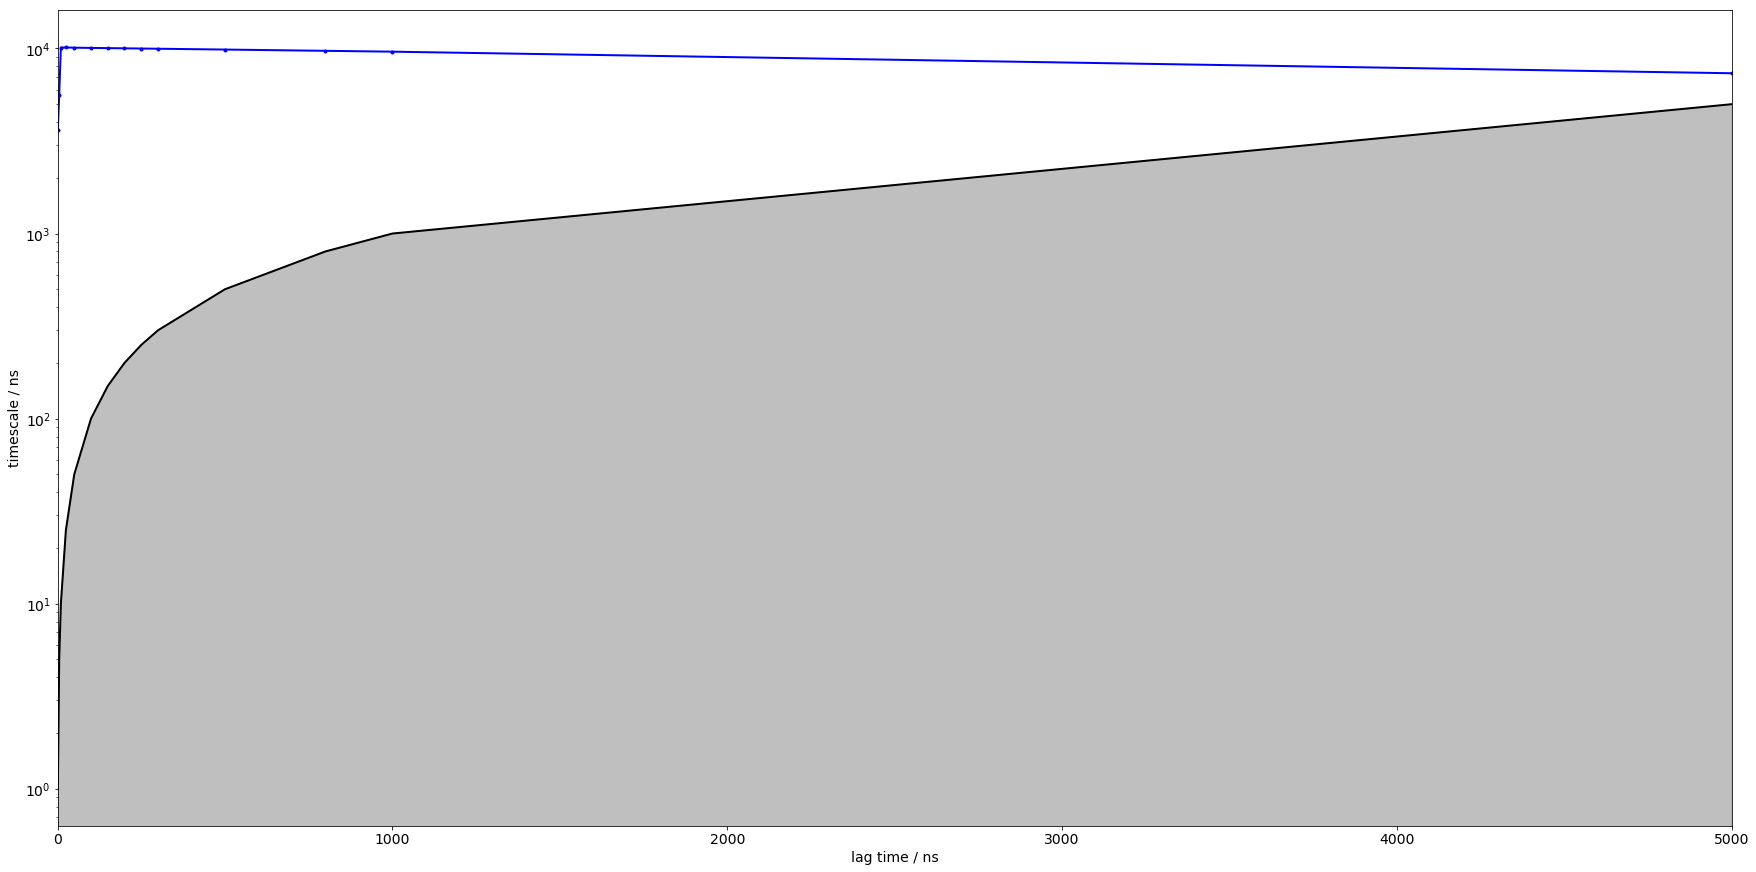

In [638]:
its_hmm = pyemma.msm.timescales_hmsm(dtraj_hdb, 2, lags=[1, 5, 10, 25, 50, 100, 150, 200, 250, 300,500,800,1000,5000])
plt.figure(figsize=(30,15))
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its_hmm, show_mean=False, ylog=True, dt=1, units='ns', linewidth=2, marker='.')

In [486]:
hmm_3_NoC = pyemma.msm.estimate_hidden_markov_model(dtraj_hdb, 2, lag=5)

In [487]:
hmm_3_NoC.transition_matrix

array([[9.99336158e-01, 6.63842175e-04],
       [8.55413240e-05, 9.99914459e-01]])

(<Figure size 2160x1440 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6d68e3d30>,
       dtype=object))

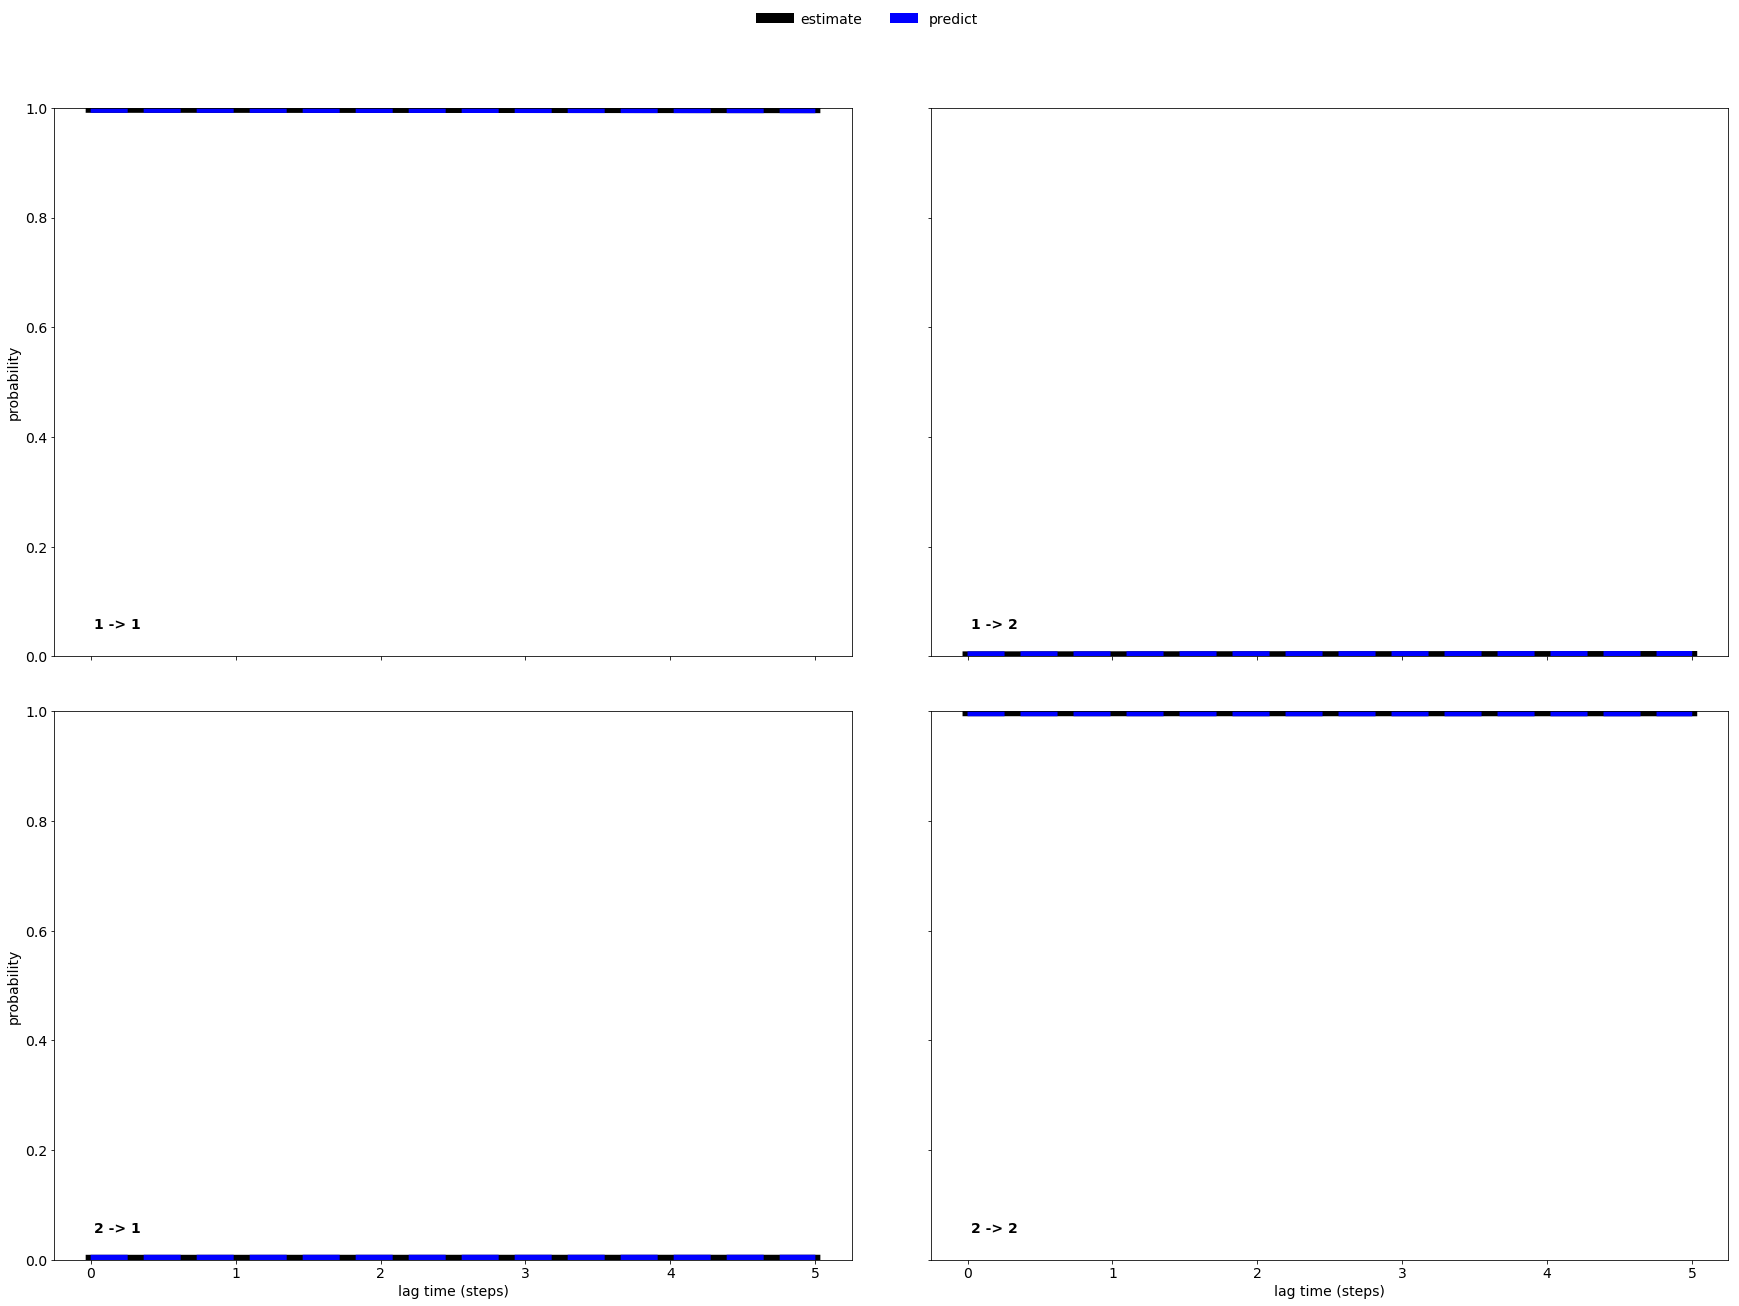

In [488]:
pyemma.plots.plot_cktest(hmm_3_NoC.cktest(mlags=2), figsize = (30,20),linewidth = 10)

(<Figure size 444.598x1080 with 1 Axes>, array([[0.        , 1.        ],
        [0.41166517, 0.        ]]))

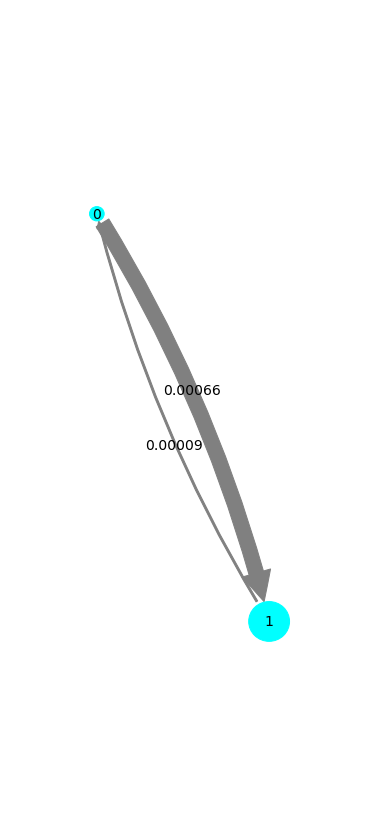

In [489]:
pyemma.plots.plot_markov_model(hmm_3_NoC, minflux=1e-5, arrow_scale=1.5, arrow_label_format='%.5f', 
                               state_scale=0.2, state_colors='cyan', figpadding=0.5, max_width =20, max_height = 15)

In [490]:
hmm_3_NoC.stationary_distribution

array([0.11414893, 0.88585107])

In [491]:
def exemplars(cluster_id, condensed_tree):
    raw_tree = condensed_tree._raw_tree
    # Just the cluster elements of the tree, excluding singleton points
    cluster_tree = raw_tree[raw_tree['child_size'] > 1]
    # Get the leaf cluster nodes under the cluster we are considering
    leaves = hdbscan.plots._recurse_leaf_dfs(cluster_tree, cluster_id)
    # Now collect up the last remaining points of each leaf cluster (the heart of the leaf)
    result = np.array([])
    for leaf in leaves:
        max_lambda = raw_tree['lambda_val'][raw_tree['parent'] == leaf].max()
        points = raw_tree['child'][(raw_tree['parent'] == leaf) &
                                   (raw_tree['lambda_val'] == max_lambda)]
        result = np.hstack((result, points))
    return result.astype(np.int)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

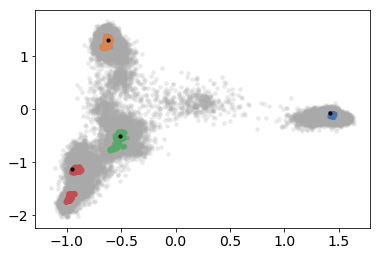

In [492]:
palette = sns.color_palette('deep', 4)
plot_kwds={'alpha':0.25, 's':20, 'linewidths':0}
tree2 = clusterer.condensed_tree_
plt.scatter(data.T[0], data.T[1], c='darkgrey', **plot_kwds)
for i, c in enumerate(tree2._select_clusters()):
    c_exemplars = exemplars(c, tree2)
    plt.scatter(data.T[0][c_exemplars], data.T[1][c_exemplars], c=palette[i], **plot_kwds)  
    plt.scatter(data.T[0][c_exemplars][:1], data.T[1][c_exemplars][:1], c='black', alpha=0.9, s=10)

In [493]:
def list_of_centers(tree, data):
    l = []
    r = []
    for i, c in enumerate(tree._select_clusters()):
        c_exemplars = exemplars(c, tree)
        #print(data.T[0][c_exemplars][:1],data.T[1][c_exemplars][:1])
        l.append(data.T[0][c_exemplars][:1][0])
        r.append(data.T[1][c_exemplars][:1][0])
        new_list = []
        for x,y in zip(l,r):
            new_list.append([x,y]) 
    return new_list

In [494]:
centers = list_of_centers(tree2,data)
print(centers)

[[1.4165803, -0.07606618], [-0.62150127, 1.2980798], [-0.507317, -0.49690405], [-0.9533746, -1.12685]]


In [495]:
#pos[1][0] +=-0.2
#pos[1][1] += 0.4
pos = np.array(centers)

In [496]:
msm_lag200_bayes

MaximumLikelihoodMSM(connectivity='largest', count_mode='sliding',
           dt_traj='1 ns', lag=200, maxerr=1e-08, maxiter=1000000,
           mincount_connectivity='1/n', reversible=True, score_k=10,
           score_method='VAMP2', sparse=False, statdist_constraint=None)

In [497]:
#metastable_traj = msm_lag200_bayes.metastable_assignments[dtraj_hdb]
highest_membership = msm_lag200_bayes.metastable_distributions.argmax(1)
print(highest_membership)

[2 0]


/home/biosim11/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/biosim11/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


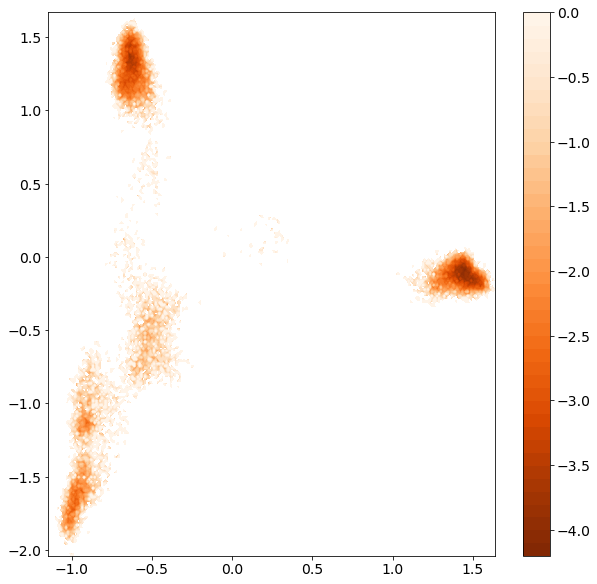

In [498]:
tica0 = np.array([])
tica1 = np.array([])
for j in range(len(tics_ca_2D)):
    tica0 = np.concatenate((tica0, tics_ca_2D[j][:,0]))
for j in range(len(tics_ca_2D)):
    tica1 = np.concatenate((tica1, tics_ca_2D[j][:,1]))    
# histogram data
z,x,y = np.histogram2d(tica0, tica1, bins=250)
extent = (x.min(), x.max(), y.min(), y.max()) # extent of the plot
# compute free energies
F = -np.log(z)
F[F == 'inf' ] = -1000
maxval = np.amax(F)
F[F == -1000] = maxval
plt.figure(figsize=(10,10))
plt.contourf(F.T, 50, cmap='Oranges_r', extent = extent)
plt.colorbar()
#plt.xlabel('TICA 1') 
#plt.ylabel('TICA 2')
#plt.show()

#del(tica0)
#del(tica1)

## Markov State Model

In [499]:
msm_pos = np.array([[1.4340731, -0.122894555],[-0.6410591, 1.2211671],[-0.89548177, -1.1517057]])

In [500]:
msm_pos

array([[ 1.4340731 , -0.12289456],
       [-0.6410591 ,  1.2211671 ],
       [-0.89548177, -1.1517057 ]])

Text(0, 0.5, 'TICA 2')

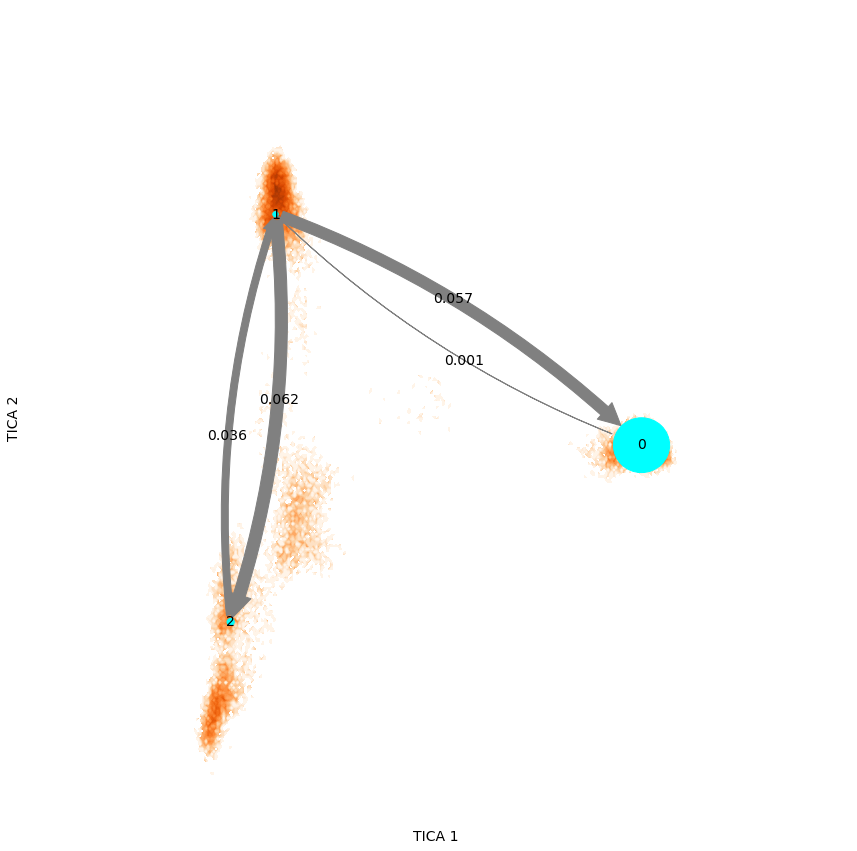

In [501]:
pyemma.plots.plot_markov_model(msm_lag200_bayes,pos=msm_pos, minflux=1e-4, arrow_scale=1.5, arrow_label_format='%.3f', 
                               state_scale=0.1, state_colors='cyan', figpadding=0.5, max_width =20, max_height = 15)

plt.contourf(F.T, 50, cmap= 'Oranges_r', extent=extent, zorder=0)
plt.xlabel('TICA 1') 
plt.ylabel('TICA 2')

In [502]:
msm_lag200_bayes.metastable_sets

[array([1, 2]), array([0])]

In [514]:
msm_lag200_bayes.pcca(2).P

array([[9.99467173e-01, 5.32827053e-04, 0.00000000e+00],
       [5.67832033e-02, 8.80839165e-01, 6.23776317e-02],
       [0.00000000e+00, 3.56753340e-02, 9.64324666e-01]])

In [515]:
for i, s in enumerate(msm_lag200_bayes.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm_lag200_bayes.pi[s].sum()))

π_1 = 0.025142
π_2 = 0.974858


In [516]:
msm_lag200_bayes.active_set

array([1, 2, 3])